## 线性回归

####  用到的包
`sklearn.linear_model.LinearRegression` 利用sklearn的已有的模型进行相关的训练
`sklearn.preprocessing.StandardScaler`  对数据进行标准化的处理：减去均值、除以标准差
`sklearn.pipeline.Pipeline`             通过Pipiline将多个处理流程串联起来

###### numpy 相关
`np.hsplit`   将一个array水平分割成多个数组
`np.linalg.lstq`   用最小二乘法计算线性矩阵方程合适的参数
`np.linalg.solve`  解线性方程，a*x=b   a,b是参数
`np.linalg.inv`    计算矩阵的逆
`np.linalg.pinv`   计算伪逆
`np.c_`            按列组合array
`np.r_`            按行组合array

    

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [10]:
np.c_[np.array([1,4]), np.array([4,1])]

array([[1, 4],
       [4, 1]])

In [ ]:
####  正则化对数据的影响
##### 预处理
`sklearn.preprocessing.PolynomialFeatures`  
多项式特征处理，将输入的特征转化为多项式特征集   例如：如果是2阶多项式 则输入 [a, b], 输出特征[1, a, b, a^2, ab, b^2]

In [ ]:
####  多分类问题
#####  用到的包
`scipy` 
`numpy.linspace`  生成等间距的int 值序列


#####  Logistic Regression


#####  神经网络 Neural Network
`sklearn.neural_network.MLPClassifier`  
`sklearn.model_selection.StratifiedShuffleSplit`  直接从数据sample中按照比例取数据进行交叉验证
`sklearn.model_selection.GridSearchCV`            根据指定的estimator(分类器)寻找最优的参数，适合小数据集          


#####  偏差和方程 bias & variance
展现 过拟合、欠拟合和good fit
`sklearn.model_selection.learning_curve`   用学习曲线learning curve判断是否有过拟合的现象


In [16]:
import csv
import scipy as sp
import scipy.io as sio
from sklearn.model_selection import ShuffleSplit, learning_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC

In [5]:
digits = sio.loadmat("D:\\learningMaterial\\PythonLanguage\\NoteBook\\machine-learning-notebooks-master\\data\\ml-ex3\\ex3data1.mat")

In [20]:
X = digits['X']
y = digits['y'].ravel()
selected = np.linspace(0, X.shape[0] - 1, 300, dtype='int16')
sigmoid = sp.special.expit

In [14]:
len(X[0])

400

In [ ]:
# 计算 回归器 的 分别在 训练集 和测试集上的表现
def compute_learning_curves(regressor, X_train, y_train, test_size):
    cv = ShuffleSplit(n_splits=50, test_size=test_size, random_state=0)
    train_sizes_rel = np.linspace(.1, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(regressor, X_train, y_train, cv=cv, train_sizes=train_sizes_rel)
    return [train_sizes, np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)]

### SVM
`sklearn.svm`   利用支持向量机算法进行分类问题求解

In [50]:
def plot_data(X, y):
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'yo', label='neg')
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'b+', label='pos')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='lower left')
def plot_bounday(X, clf, level=0.0):
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    h = 0.01
    grid_x1, grid_x2 = np.meshgrid(np.arange(x1_min, x1_max, h), 
                                   np.arange(x2_min, x2_max, h))
    grid_y = clf.predict(np.c_[grid_x1.ravel(), grid_x2.ravel()])
    grid_y = grid_y.reshape(grid_x1.shape)
    x1_extra = (x1_max-x1_min) / 50
    x2_extra = (x2_max-x2_min) / 50
    plt.xlim(x1_min -x1_extra, x1_max+x1_extra)
    plt.ylim(x2_min -x2_extra, x2_max+x2_extra)
    plt.contour(grid_x1, grid_x2, grid_y, levels=[level])
    

def plot_boundary_XY(X, clf, level=0.0):
    '''Plots a decision boundary using trained classifier clf.
    
    The decision boundary is drawn at given level (default=0.0)
    in the range of X. X must be an array of shape (m,2).
    '''
    
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    h = 0.01 # grid step size
    grid_x1, grid_x2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                                   np.arange(x2_min, x2_max, h))
    
    grid_y = clf.predict(np.c_[grid_x1.ravel(), grid_x2.ravel()])
    grid_y = grid_y.reshape(grid_x1.shape)

    x1_extra = (x1_max - x1_min) / 50
    x2_extra = (x2_max - x2_min) / 50
    
    plt.xlim(x1_min - x1_extra, x1_max + x1_extra)
    plt.ylim(x2_min - x2_extra, x2_max + x2_extra)
    
    plt.contour(grid_x1, grid_x2, grid_y, levels=[level])

In [6]:
data = sio.loadmat("D:\\learningMaterial\\PythonLanguage\\NoteBook\\machine-learning-notebooks-master\\data\\ml-ex6\\ex6data1.mat")

In [19]:
X = data['X']
y = data['y'].ravel()


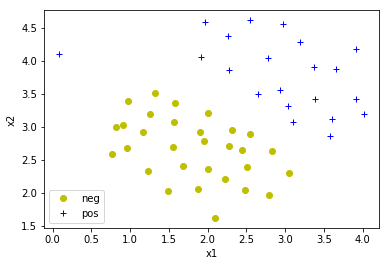

In [30]:
plot_data(X, y)
plt.show()

In [32]:
clf = SVC(C=1, kernel='linear')
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

D:\software\Anaconda\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


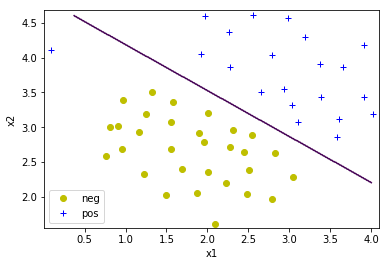

In [52]:
# plot_boundary_XY(X, clf=clf)
plot_data(X, y)
plot_bounday(X, clf=clf)
plt.show()

In [53]:
data2 = sio.loadmat("D:\\learningMaterial\\PythonLanguage\\NoteBook\\machine-learning-notebooks-master\\data\\ml-ex6\\ex6data2.mat")

D:\software\Anaconda\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


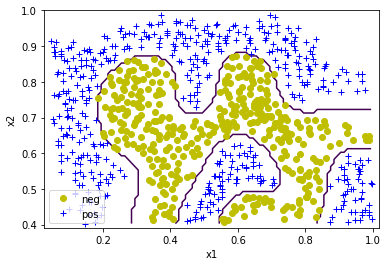

In [57]:
X = data2['X']
y = data2['y'].ravel()
clf2 = SVC(C=1, kernel='rbf', gamma=100)
clf2.fit(X, y)
plot_data(X, y)
plot_bounday(X, clf2)
plt.show()

In [ ]:
# 垃圾邮件分类

In [3]:
data_train = sio.loadmat("D:\\learningMaterial\\PythonLanguage\\NoteBook\\machine-learning-notebooks-master\\data\\ml-ex6\\spamTrain.mat")
data_test = sio.loadmat("D:\\learningMaterial\\PythonLanguage\\NoteBook\\machine-learning-notebooks-master\\data\\ml-ex6\\spamTest.mat")

In [14]:
X_train = data_train['X']
X_test = data_test['Xtest']
y_train = data_train['y'].ravel()
y_test = data_test['ytest'].ravel()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, type(y_test))

(4000, 1899) (1000, 1899) (4000,) (1000,) <class 'numpy.ndarray'>


In [15]:
clf = LinearSVC(C=0.1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(train_score, test_score)

0.99199999999999999

In [19]:

vocab = {}
with open('D:\\learningMaterial\\PythonLanguage\\NoteBook\\machine-learning-notebooks-master\\data\\ml-ex6\\vocab.txt') as vocab_file:
   #按行读取，然后按照制表符分割
    for row in csv.reader(vocab_file, delimiter='\t'):
        word = row[1]
        index = int(row[0]) -1
        vocab[word] = index

In [20]:
def read_file(file):
    with open(file) as f:
        return f.read()
    
email_1 = read_file('D:\\learningMaterial\\PythonLanguage\\NoteBook\\machine-learning-notebooks-master\\data\\ml-ex6\\emailSample1.txt')
email_2 = read_file("D:\\learningMaterial\\PythonLanguage\\NoteBook\\machine-learning-notebooks-master\\data\\ml-ex6\\emailSample2.txt")

spam_1 = read_file("D:\\learningMaterial\\PythonLanguage\\NoteBook\\machine-learning-notebooks-master\\data\\ml-ex6\\spamSample1.txt")
spam_2 = read_file("D:\\learningMaterial\\PythonLanguage\\NoteBook\\machine-learning-notebooks-master\\data\\ml-ex6\\spamSample2.txt")


{'aa': 0, 'ab': 1, 'abil': 2, 'abl': 3, 'about': 4, 'abov': 5, 'absolut': 6, 'abus': 7, 'ac': 8, 'accept': 9, 'access': 10, 'accord': 11, 'account': 12, 'achiev': 13, 'acquir': 14, 'across': 15, 'act': 16, 'action': 17, 'activ': 18, 'actual': 19, 'ad': 20, 'adam': 21, 'add': 22, 'addit': 23, 'address': 24, 'administr': 25, 'adult': 26, 'advanc': 27, 'advantag': 28, 'advertis': 29, 'advic': 30, 'advis': 31, 'ae': 32, 'af': 33, 'affect': 34, 'affili': 35, 'afford': 36, 'africa': 37, 'after': 38, 'ag': 39, 'again': 40, 'against': 41, 'agenc': 42, 'agent': 43, 'ago': 44, 'agre': 45, 'agreement': 46, 'aid': 47, 'air': 48, 'al': 49, 'alb': 50, 'align': 51, 'all': 52, 'allow': 53, 'almost': 54, 'alon': 55, 'along': 56, 'alreadi': 57, 'alsa': 58, 'also': 59, 'altern': 60, 'although': 61, 'alwai': 62, 'am': 63, 'amaz': 64, 'america': 65, 'american': 66, 'among': 67, 'amount': 68, 'amp': 69, 'an': 70, 'analysi': 71, 'analyst': 72, 'and': 73, 'ani': 74, 'anim': 75, 'announc': 76, 'annual': 77, 'a

In [22]:
# 对数据进行预处理
# step1：将一封未处理的文本进行分词
# step2: 对照vocab字典，通过0、1的矩阵来表示分词是否出现在字典中
# step3： 以step2中产生的矩阵作为输入，预测输出，判断邮件是否是垃圾邮件

### k-means 聚类和pca主成分分析


In [23]:
import numpy as  np
import scipy.io as sio
import scipy.misc as sm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, NoNorm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
% %matplotlib inline
# 中文
from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"c:\windows\Fonts\simsun.ttc", size=12) 

In [24]:
data = sio.loadmat("D:\\learningMaterial\\PythonLanguage\\NoteBook\\machine-learning-notebooks-master\\data\\ml-ex7\\ex7data2.mat")

In [29]:
X = data['X']
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
y = kmeans.labels_

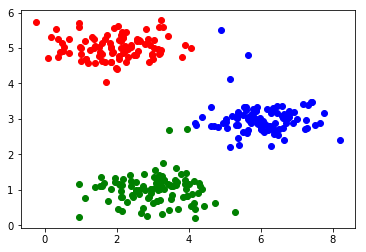

In [36]:
# 绘制不同的集群
def plot_cluster(X, y, color, cluster):
    plt.plot(X[y==cluster,0], X[y==cluster,1], f'{color}o', label=f'Cluster{cluster}')
for i, color in enumerate('rgb'):
    plot_cluster(X, y, color, i)
plt.show()

In [61]:
# 图片压缩
APicture = sm.imread("D://learningMaterial//PythonLanguage//NoteBook//machine-learning-notebooks-master//data//ml-ex7/bird_small.png")/255
print(type(APicture), APicture.shape)
# 将图片变为仅三通道, 说明接下来将专注与考虑颜色通道的影响，以像素为单位
X = APicture.reshape(-1, 3)
print(X.shape)
print(X[0])

<class 'numpy.ndarray'> (128, 128, 3)
(16384, 3)
[ 0.85882353  0.70588235  0.40392157]


In [62]:
# 利用k-means聚类找到top16的几个颜色
kmeans = KMeans(n_clusters=16)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [70]:
A_compresed = kmeans.labels_.reshape(128, 128) #压缩为16色
# l_cluster = kmeans.cluster_centers_ * 255
cmap = ListedColormap(kmeans.cluster_centers_)
# cmap = ListedColormap(l_cluster)
print(kmeans.cluster_centers_)

[[ 0.16613599  0.16701533  0.1588909 ]
 [ 0.76038378  0.61034828  0.34514902]
 [ 0.65562963  0.47627887  0.21406972]
 [ 0.97698554  0.94641243  0.81833666]
 [ 0.29007654  0.26007288  0.25667573]
 [ 0.58722864  0.4999431   0.44753589]
 [ 0.70042729  0.62906519  0.56274035]
 [ 0.46780738  0.33749894  0.18135694]
 [ 0.91946089  0.57270017  0.25407902]
 [ 0.08495454  0.092048    0.0818346 ]
 [ 0.8699621   0.71871337  0.45771485]
 [ 0.45730392  0.38712745  0.35457353]
 [ 0.3864331   0.45661765  0.64597751]
 [ 0.96404314  0.86015294  0.63281569]
 [ 0.56848627  0.72039216  0.86864314]
 [ 0.82767822  0.74651344  0.73715102]]


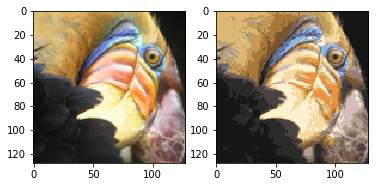

In [71]:
plt.subplot(1,2,1)
plt.imshow(APicture)

plt.subplot(1,2,2)
# plt.imshow(A_compresed, cmap=cmap, norm=NoNorm())
plt.imshow(A_compresed, cmap=cmap, norm=NoNorm())

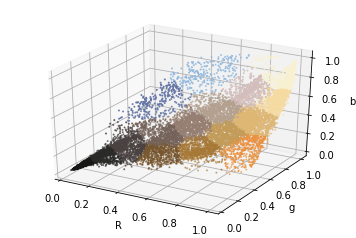

In [73]:
sp = plt.figure().add_subplot(111, projection='3d')
sp.set_xlabel('R')
sp.set_ylabel('g')
sp.set_zlabel('b')
sp.scatter(X[:, 0], X[:, 1], X[:, 2], s=1, c=kmeans.labels_, cmap=cmap)


Text(0,0.5,'Princpal componnet2')

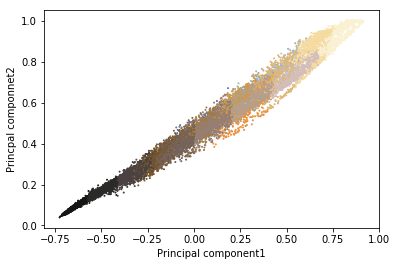

In [77]:
pca = PCA(n_components=2)
pca.fit(X)
X_pred = pca.transform(X)
plt.scatter(X_pred[:, 0], X[:, 1], s=1, c=kmeans.labels_, cmap=cmap)
plt.xlabel("Principal component1")
plt.ylabel('Princpal componnet2')


In [2]:
from sklearn.mixture import GaussianMixture
help(GaussianMixture.score_samples)

Help on function score_samples in module sklearn.mixture.base:

score_samples(self, X)
    Compute the weighted log probabilities for each sample.
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row
        corresponds to a single data point.
    
    Returns
    -------
    log_prob : array, shape (n_samples,)
        Log probabilities of each data point in X.

